In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/cancer classification/lung cancer

/content/drive/.shortcut-targets-by-id/1FTi9I7XZ7sbmMn4glRPu2WAxfIyQLwRZ/cancer classification/lung cancer


In [ ]:
# **DATA PROCESSING**

import numpy as np # Array Processing
import pandas as pd # Data Processing
import os # Input of Data
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

Lets import our main data into the notebook

In [ ]:
data = pd.read_csv("lung_cancer.csv")

In [ ]:
class_names = ["No", "Yes"]

It is a good habit to take a look at the data first. It gives us a lot of knowledge

In [ ]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
#Remove duplicates in the dataset
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)

33


Categorical data is harder for the system to compute and thus making it numerical will be benifical. Lets replace the values of our target with numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['LUNG_CANCER']=encoder.fit_transform(data['LUNG_CANCER'])
data['GENDER']=encoder.fit_transform(data['GENDER'])

In [ ]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
data.shape

(276, 16)

In [ ]:
data.LUNG_CANCER.value_counts()

,count
LUNG_CANCER,
1,238
0,38


Now lets divide our datasets into train and test data

In [ ]:
# creating features and label

X = data.drop('LUNG_CANCER', axis = 1)
y = data['LUNG_CANCER']

In [ ]:
print(X.shape)
print(y.shape)

(276, 15)
(276,)


In [ ]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)

In [ ]:
print(X_train.shape, "    " , X_test.shape)
print(y_train.shape, "    " , y_test.shape)


(220, 15)      (56, 15)
(220,)      (56,)


In [ ]:
from collections import Counter
print(Counter(y_train))

Counter({1: 190, 0: 30})


In [ ]:
#Random data shuffle
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(374, 15)
(56, 15)


In [ ]:
# Need to know the number of values for every class after oversampling

from collections import Counter
print(Counter(y_train))


Counter({1: 187, 0: 187})


# Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)
# best parameters

grid_search.best_params_

{'C': 10, 'gamma': 0.001}

In [ ]:
best_svc=grid_search.best_estimator_

In [ ]:
# model predictions

y_pred = best_svc.predict(X_test)
# accuracy score

svc_acc = accuracy_score(y_test, y_pred)
print(svc_acc)

0.9285714285714286


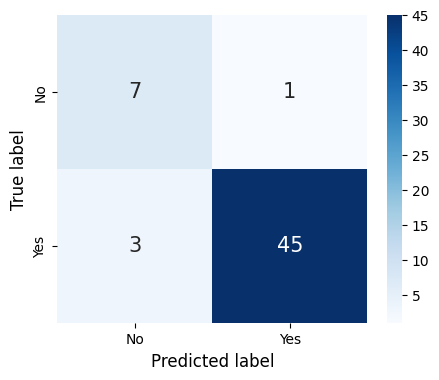

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
class_names = ["No", "Yes"]

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5,4)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15},
            xticklabels=class_names, yticklabels=class_names) # Add class names here
plt.title('', size=24) # Adjust title size as needed
plt.xlabel('Predicted label', size=12) # Adjust label size as needed
plt.ylabel('True label', size=12) # Adjust label size as needed
plt.xticks(rotation=0) # Optional: Rotate x-axis labels if needed
plt.yticks(rotation=90) # Optional: Rotate y-axis labels if needed
plt.show()

In [ ]:
# classification report

print(classification_report(y_test, y_pred,target_names=class_names, digits=4))

              precision    recall  f1-score   support

          No     0.7000    0.8750    0.7778         8
         Yes     0.9783    0.9375    0.9574        48

    accuracy                         0.9286        56
   macro avg     0.8391    0.9062    0.8676        56
weighted avg     0.9385    0.9286    0.9318        56



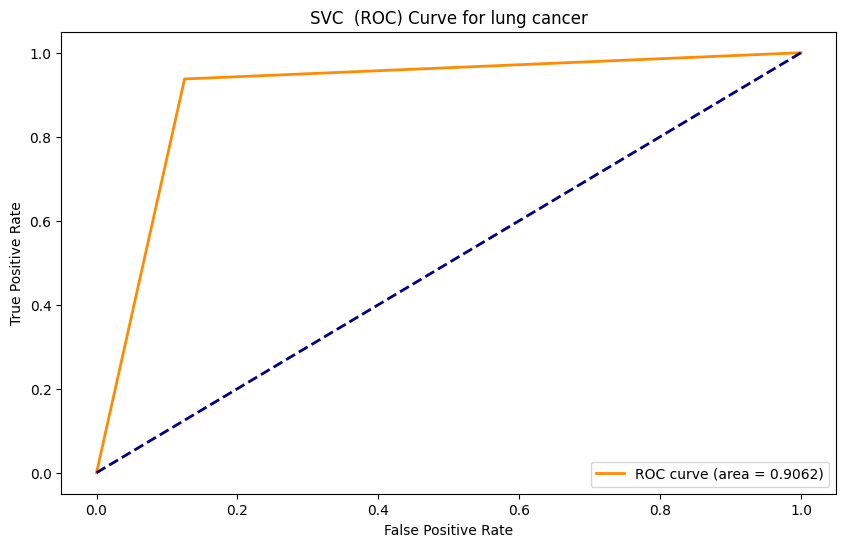

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC  (ROC) Curve for lung cancer')
plt.legend(loc='lower right')
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 5),
    'min_samples_leaf' : range(1, 10, 3),
    'min_samples_split' : range(2, 10, 3),
    'splitter' : ['best', 'random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, y_train)
print(grid_search_dt.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}


In [ ]:
best_dtc = grid_search_dt.best_estimator_
y_pred = best_dtc.predict(X_test)
# accuracy score

dtc_acc = accuracy_score(y_test, y_pred)
print(dtc_acc)
# classification report


print(classification_report(y_test, y_pred,target_names=class_names, digits=4))

0.8571428571428571
              precision    recall  f1-score   support

          No     0.5000    0.7500    0.6000         8
         Yes     0.9545    0.8750    0.9130        48

    accuracy                         0.8571        56
   macro avg     0.7273    0.8125    0.7565        56
weighted avg     0.8896    0.8571    0.8683        56



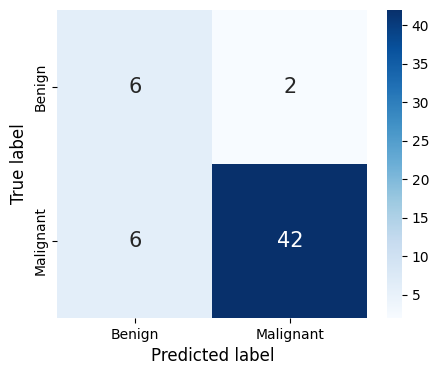

In [ ]:
from sklearn import metrics
class_names = ["Benign", "Malignant"]

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5,4)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15},
            xticklabels=class_names, yticklabels=class_names) # Add class names here
plt.title('', size=24) # Adjust title size as needed
plt.xlabel('Predicted label', size=12) # Adjust label size as needed
plt.ylabel('True label', size=12) # Adjust label size as needed
plt.xticks(rotation=0) # Optional: Rotate x-axis labels if needed
plt.yticks(rotation=90) # Optional: Rotate y-axis labels if needed
plt.show()

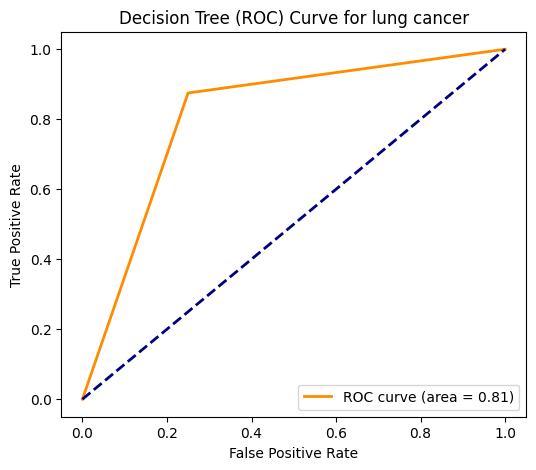

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree (ROC) Curve for lung cancer')
plt.legend(loc='lower right')
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200],          # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 11, 12],                  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']           # Function to measure the quality of a split
}

# Create a RandomForestClassifier instance
rand_clf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV with the RandomForestClassifier, parameter grid, and cross-validation
grid_search = GridSearchCV(estimator=rand_clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', error_score=0)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_  #Dictionary
best_accuracy = grid_search.best_score_

best_rand_clf=grid_search.best_estimator_

print("Best Parameters: ", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
y_pred = best_rand_clf.predict(X_test)
# accuracy score

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

# classification report

print(classification_report(y_test, y_pred,target_names=class_names, digits=4))

0.9642857142857143
              precision    recall  f1-score   support

      Benign     0.8000    1.0000    0.8889         8
   Malignant     1.0000    0.9583    0.9787        48

    accuracy                         0.9643        56
   macro avg     0.9000    0.9792    0.9338        56
weighted avg     0.9714    0.9643    0.9659        56



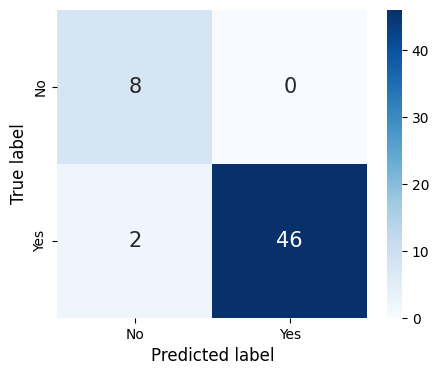

In [ ]:
from sklearn import metrics
class_names = ["No", "Yes"]

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5,4)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15},
            xticklabels=class_names, yticklabels=class_names) # Add class names here
plt.title('', size=24) # Adjust title size as needed
plt.xlabel('Predicted label', size=12) # Adjust label size as needed
plt.ylabel('True label', size=12) # Adjust label size as needed
plt.xticks(rotation=0) # Optional: Rotate x-axis labels if needed
plt.yticks(rotation=90) # Optional: Rotate y-axis labels if needed
plt.show()

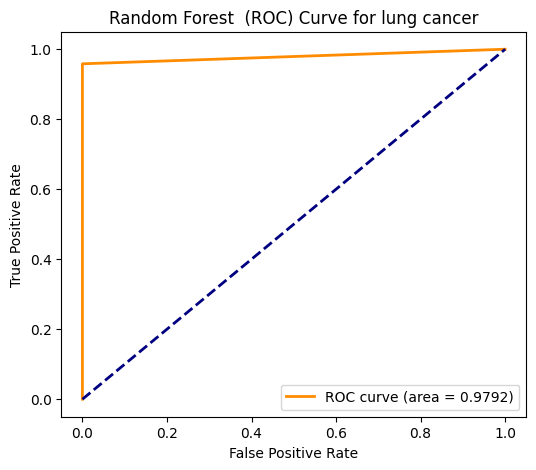

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest  (ROC) Curve for lung cancer')
plt.legend(loc='lower right')
plt.show()

# Extreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.1, 0.5, 1.0],  # Learning rate
    'max_depth': [3, 4, 5],            # Maximum depth of the tree
    'n_estimators': [150, 180, 200]     # Number of boosting rounds
}

# Create an XGBClassifier instance
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Instantiate GridSearchCV with the XGBClassifier, parameter grid, and cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', error_score=0)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Train the model with the best parameters
best_xgb = XGBClassifier(**best_params, objective='binary:logistic', random_state=42)
best_xgb.fit(X_train, y_train)


print("Best Parameters: ", best_params)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}


In [ ]:
y_pred = best_xgb.predict(X_test)
# accuracy score

xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

# classification report

print(classification_report(y_test, y_pred,target_names=class_names, digits=4))

0.9285714285714286
              precision    recall  f1-score   support

          No     0.7000    0.8750    0.7778         8
         Yes     0.9783    0.9375    0.9574        48

    accuracy                         0.9286        56
   macro avg     0.8391    0.9062    0.8676        56
weighted avg     0.9385    0.9286    0.9318        56



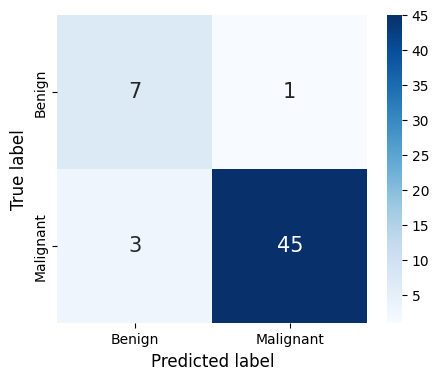

In [ ]:
from sklearn import metrics
class_names = ["Benign", "Malignant"]

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5,4)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15},
            xticklabels=class_names, yticklabels=class_names) # Add class names here
plt.title('', size=24) # Adjust title size as needed
plt.xlabel('Predicted label', size=12) # Adjust label size as needed
plt.ylabel('True label', size=12) # Adjust label size as needed
plt.xticks(rotation=0) # Optional: Rotate x-axis labels if needed
plt.yticks(rotation=90) # Optional: Rotate y-axis labels if needed
plt.show()

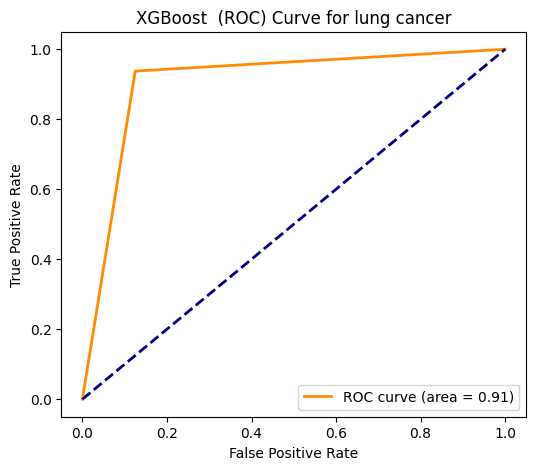

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost  (ROC) Curve for lung cancer')
plt.legend(loc='lower right')
plt.show()

# camparison

In [ ]:
models = pd.DataFrame({
    'Model': ['SVC',  'Decision Tree Classifier', 'Random Forest Classifier',
              'XgBoost'],
    'Score': [ svc_acc, dtc_acc, ran_clf_acc, xgb_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,0.964286
0,SVC,0.928571
3,XgBoost,0.928571
1,Decision Tree Classifier,0.857143
